# Hierarchical Clustering

# Practice Session

## Demo 4.1: Hierarchical Clustering

### Importing Libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Loading Data

In [32]:
df=pd.read_csv('/content/DS2_C6_S3_CarSales_Data_Practice.csv')

### Preprocessing Data

In [33]:
(df.isna().sum()) 

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [34]:
df=df.drop('__year_resale_value',axis=1) # removing the field

In [35]:
data_df=df
data_df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [36]:
#converting non int type to category
data_df['Manufacturer']=data_df['Manufacturer'].astype('category')
data_df['Model']=data_df['Model'].astype('category')
data_df['Vehicle_type']=data_df['Vehicle_type'].astype('category')
data_df['Latest_Launch']=data_df['Latest_Launch'].astype('category')


In [37]:
# Label encoding
# categorical to numerical as the model works on numerical values
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data_df['Manufacturer_encode']= label_encoder.fit_transform(data_df['Manufacturer'])
data_df['Manufacturer_encode'].unique()

data_df['Model_encode']= label_encoder.fit_transform(data_df['Model'])
data_df['Model_encode'].unique()

data_df['Vehicle_type_encode']= label_encoder.fit_transform(data_df['Vehicle_type'])
data_df['Vehicle_type_encode'].unique()

data_df['Latest_Launch']= label_encoder.fit_transform(data_df['Latest_Launch'])
data_df['Latest_Launch'].unique()



array([ 47,  93,   9,  52,  20, 119,  50,  91,   7,  73,  25, 129,  57,
       101,  48,  72,  29, 128,  67, 109,  55,  79,  38,  15,  75, 122,
        65,  87,   3,  24,  95,  19,  82,  99,  43,  34,  96,  17,  88,
       118,  61,  10, 103,  27,  90, 120,  59,   8, 111,  36, 100, 127,
        70,  49, 123,   0, 108,  14,  78,  56,  21,  51, 121,  23,  85,
        66,  31,  60,  18,  33, 106,  74,  30,  58,  16, 114,  94,  39,
        68,  26, 113,  92,   4,  77,  35, 125, 102,  44,  12,  69,  98,
        84,  54,   2, 117, 105,  64,  42, 115, 110,  81,  62, 126,   5,
       112,  80,  63,  45, 124,  89,  71,  22,   6,  28,  86,  11,  76,
        46,  37,  97,  32,  83,  53,   1, 116,  41, 104,  40, 107,  13])

In [38]:

#imputation based method to fill in missing values of each column
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = data_df.select_dtypes(include=numerics)
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=5)
#df_filled=imputer.fit_transform(new_df).toseries()
df_filled = pd.DataFrame(imputer.fit_transform(new_df),columns=new_df.columns)
df_filled.columns

Index(['Sales_in_thousands', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor',
       'Manufacturer_encode', 'Model_encode', 'Vehicle_type_encode'],
      dtype='object')

In [39]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
 numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
 new_data_df = df_filled.select_dtypes(include=numerics)
 
 if scale == 'minmax':
     scaler = MinMaxScaler()
 else:
     scaler = StandardScaler()
 df_scaled = pd.DataFrame(scaler.fit_transform(new_data_df.to_numpy()),columns=new_data_df.columns)
 return df_scaled

In [40]:
# scaling the data using MinMax Scaling process
scale = 'MinMax' 
data_df_scaled=feature_scale(scale)
data_df_scaled
data_df1=data_df_scaled
data_df1.head(10)

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Manufacturer_encode,Model_encode,Vehicle_type_encode
0,-0.532042,-0.415046,-1.214376,-0.814043,-0.828562,-1.123975,-1.122039,-1.185695,-1.227193,0.984337,-0.459471,-0.754924,-1.694221,0.029623,0.594515
1,-0.200761,0.070066,0.134385,0.694470,0.080215,-0.249496,0.412744,0.216162,-0.192199,0.275434,0.755578,0.572142,-1.694221,1.453800,0.594515
2,-0.573406,0.387625,0.134385,0.694470,-0.077833,-0.162048,0.345363,0.141119,-0.192199,0.511735,-1.463207,0.609647,-1.694221,-1.172026,0.594515
3,-0.654896,1.026229,0.423406,0.428262,0.936309,0.071147,0.689753,0.747845,0.014800,-0.433470,-0.327400,0.572904,-1.694221,0.830723,0.594515
4,-0.480754,-0.239984,-1.214376,-0.636571,-0.644172,-0.861631,-0.702781,-0.612498,-0.399198,0.748036,-1.172652,-0.574556,-1.577506,-1.550323,0.594515
5,-0.504599,0.460265,-0.250975,0.250790,0.159239,1.441164,0.345363,0.286414,0.144174,-0.433470,1.442345,0.299208,-1.577506,-1.528071,0.594515
6,-0.761189,2.432352,1.097787,2.202984,0.725579,0.829029,0.809541,0.830871,1.489666,-0.669771,-0.380228,2.308086,-1.577506,-1.505818,0.594515
7,-0.490339,-0.029066,-0.539996,-0.281627,-0.025150,-0.803333,-0.852516,-0.323505,-0.347448,0.511735,0.702750,-0.237139,-1.460792,-1.661587,0.594515
8,-0.645414,0.421597,-0.250975,0.126559,-0.025150,-0.774183,-0.852516,-0.294766,-0.347448,0.039133,-1.516035,0.191407,-1.460792,-1.639335,0.594515
9,-0.523076,0.808280,-0.250975,0.126559,0.514848,-0.074600,0.045893,0.144313,0.144174,0.275434,0.227296,0.276493,-1.460792,-1.572576,0.594515


In [41]:
data_df1.columns

Index(['Sales_in_thousands', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor',
       'Manufacturer_encode', 'Model_encode', 'Vehicle_type_encode'],
      dtype='object')

### Plotting Dendogram

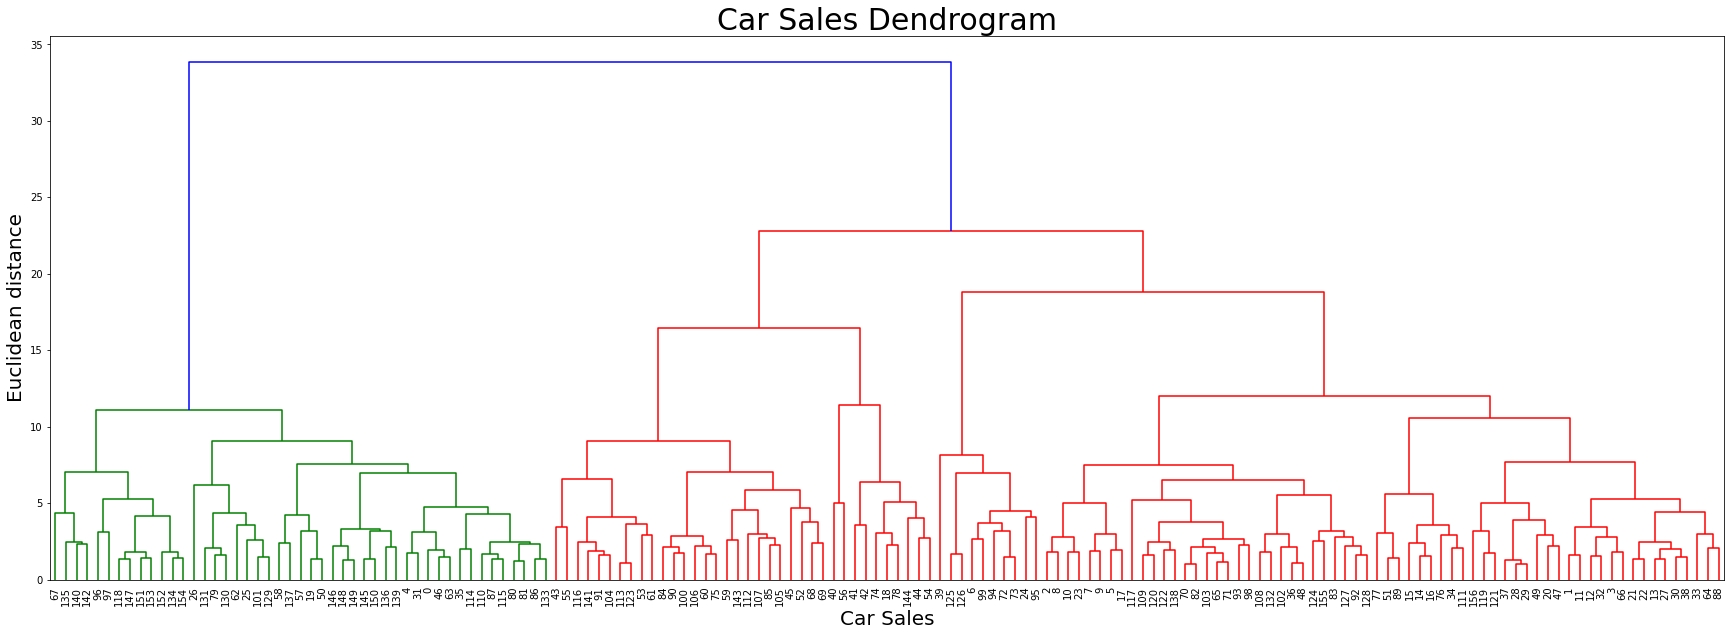

In [42]:
X=data_df1

plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=data_df1.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Car Sales Dendrogram',fontsize=30)
plt.xlabel('Car Sales',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

The vertical line with maximum distance is the
blue line and hence we can decide a threshold of 28 to cut the dendrogram into 2 clusters

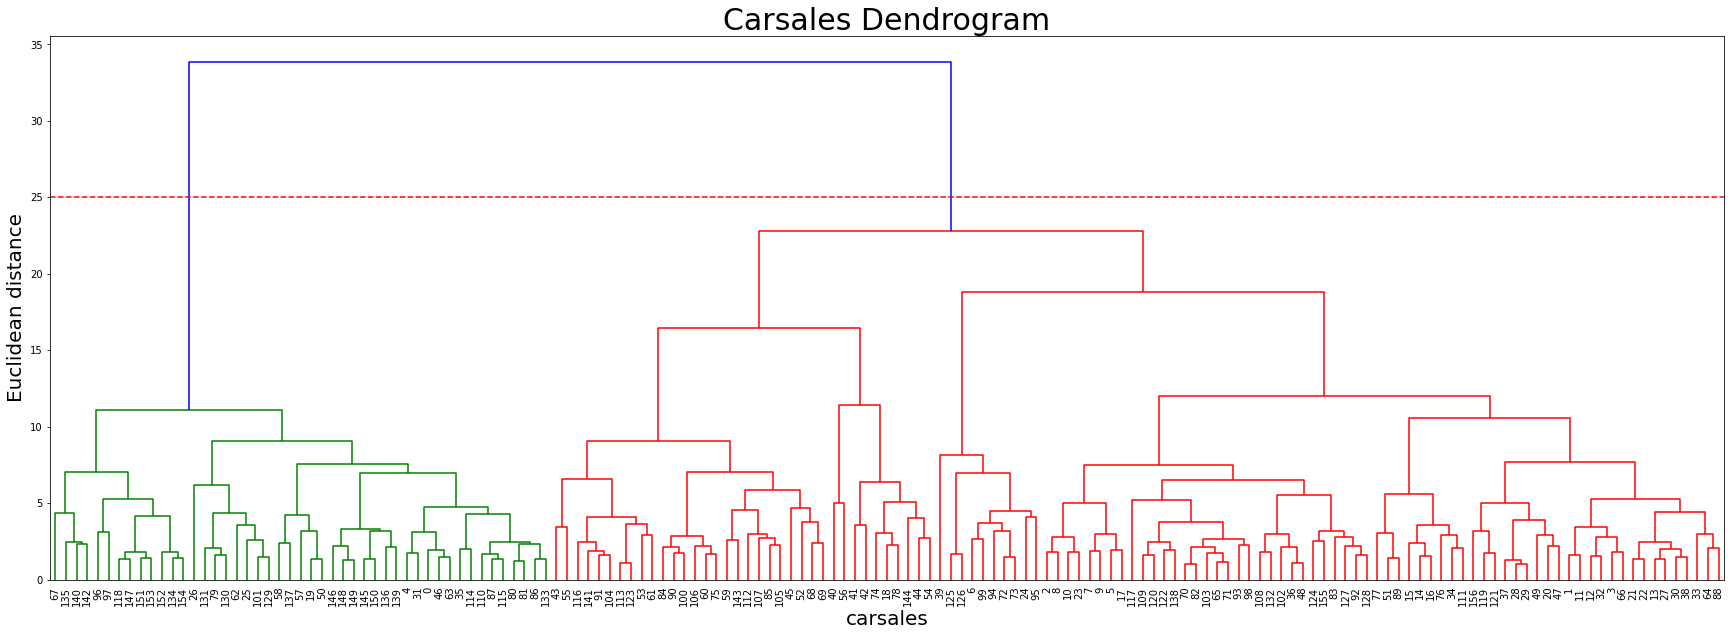

In [43]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=data_df1.index)
plt.axhline(y=25, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Carsales Dendrogram',fontsize=30)
plt.xlabel('carsales',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

### Model Building

In [44]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

### Task 4 :Visualising Clusters

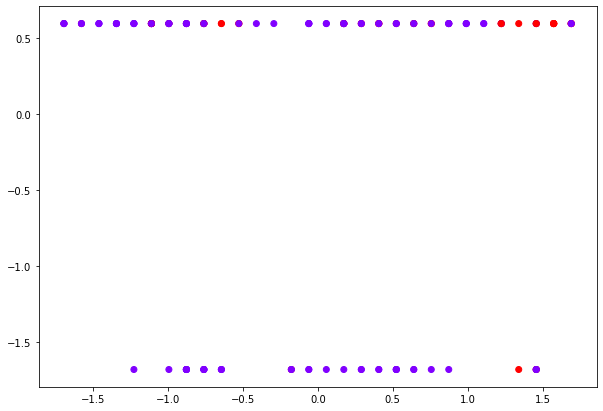

In [45]:
plt.figure(figsize=(10, 7))

plt.scatter(data_df1['Manufacturer_encode'], data_df1['Vehicle_type_encode'], c=hc.labels_, cmap='rainbow')

The plot shows the distribution of the features Manufaxturer and Vehicle_type. The clusters are not properly formed and the data points are mixed

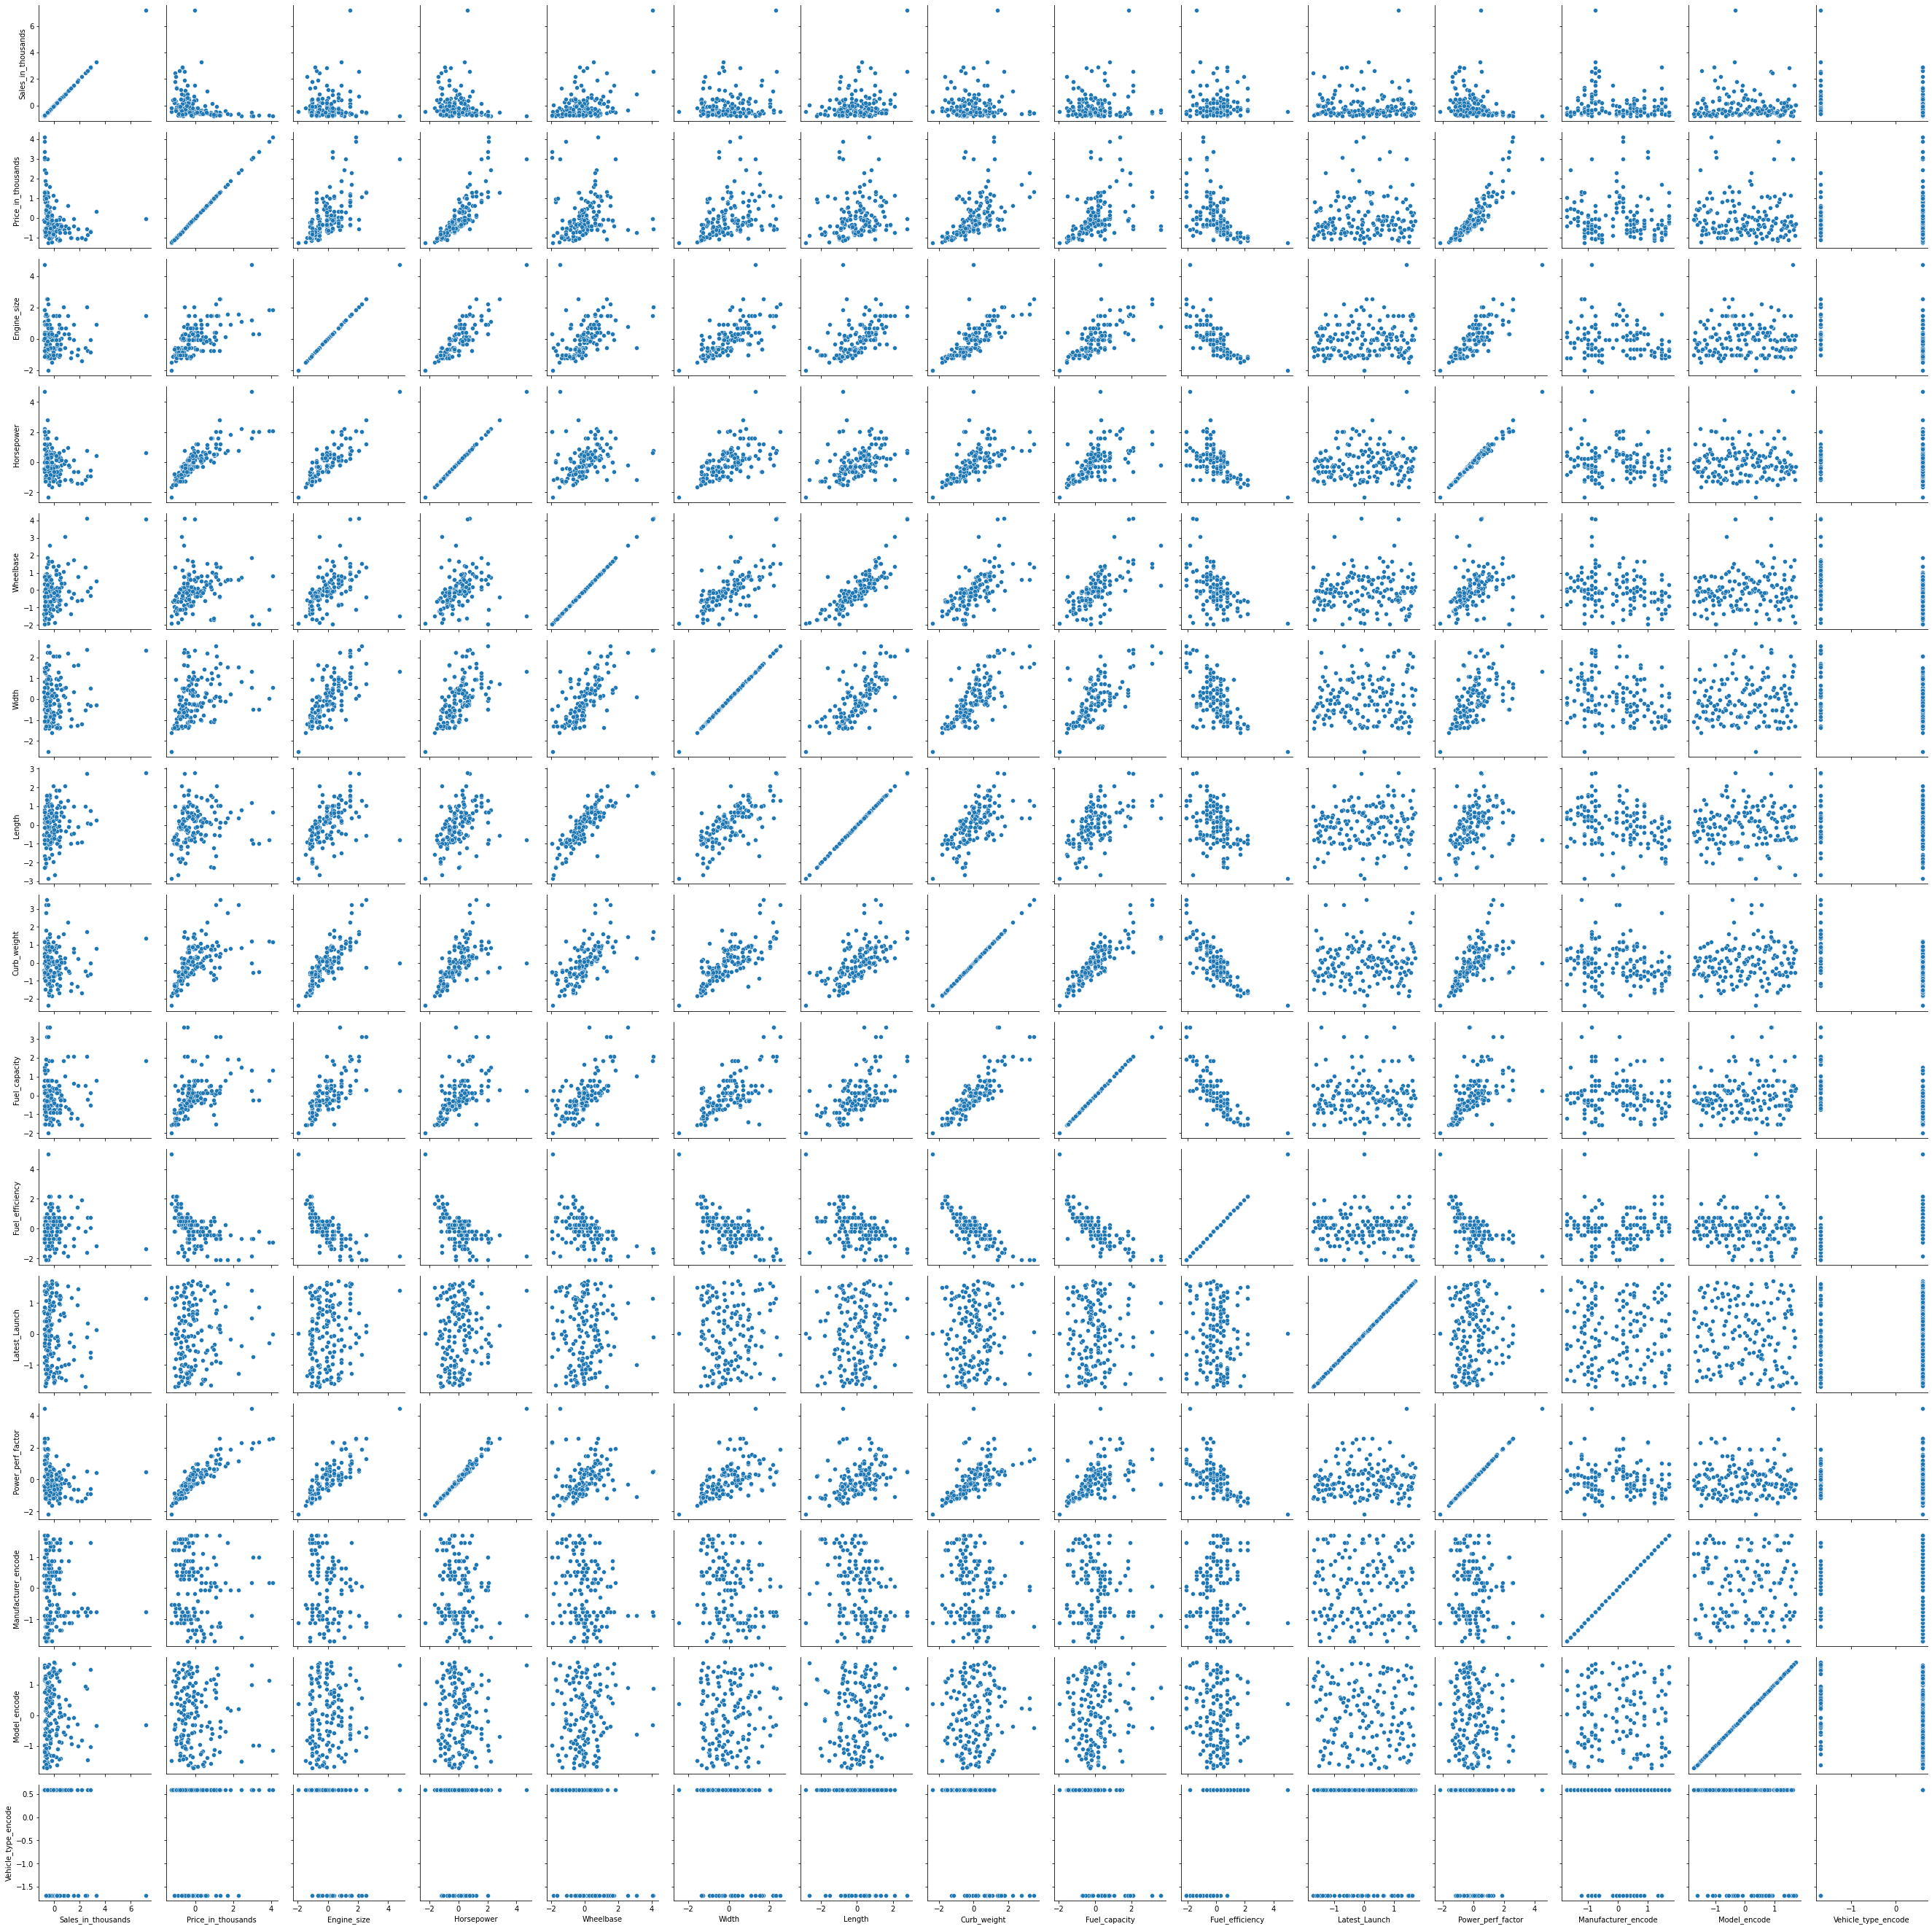

In [46]:
import seaborn as sns
g = sns.PairGrid(data_df1)
g.map(sns.scatterplot);

Gives an ides about the distribution of the features available in the dataset

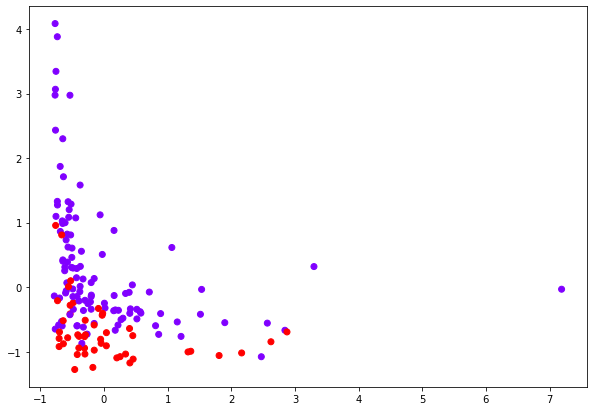

In [47]:
plt.figure(figsize=(10, 7))

plt.scatter(data_df1['Sales_in_thousands'], data_df1['Price_in_thousands'], c=hc.labels_, cmap='rainbow')

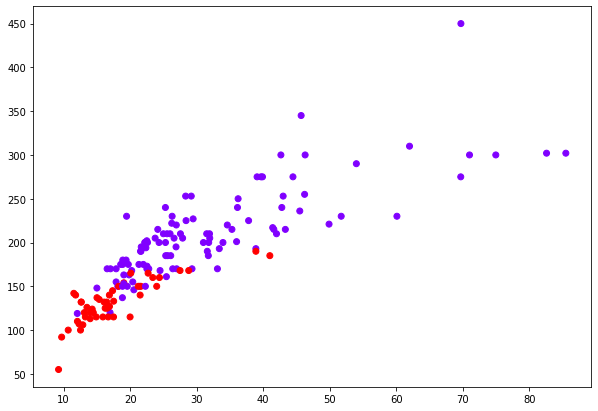

In [48]:
plt.figure(figsize=(10, 7))

plt.scatter(df['Price_in_thousands'], df['Horsepower'], c=hc.labels_, cmap='rainbow')

With the data we have, the clusters formed are overlapping and are not clearly distinctive

### Different linkages are- Single, average,Complete,ward,centroid

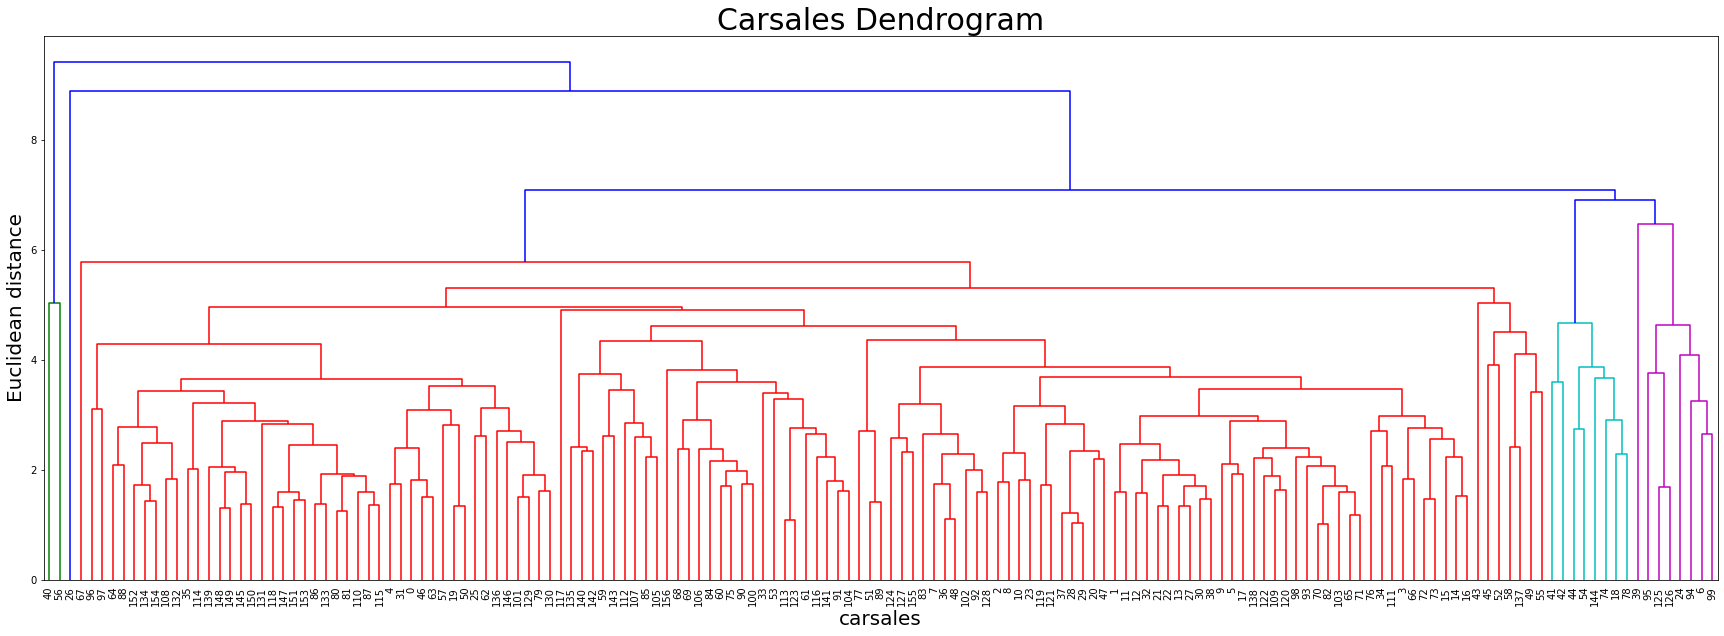

In [49]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'average'),labels=data_df1.index)
plt.axhline(y=25, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Carsales Dendrogram',fontsize=30)
plt.xlabel('carsales',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [53]:
hc1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')
y_hc1 = hc1.fit_predict(X)

In [54]:
hc1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

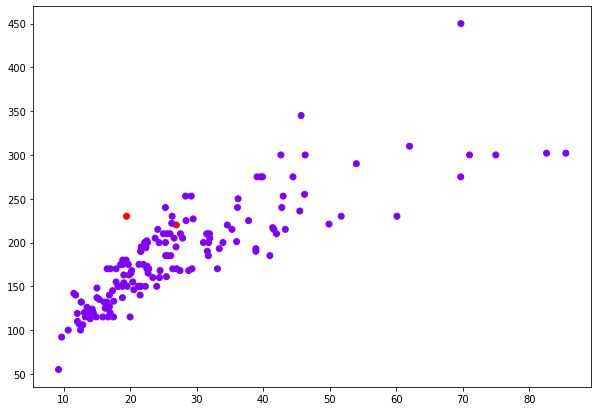

In [55]:
plt.figure(figsize=(10, 7))

plt.scatter(df['Price_in_thousands'], df['Horsepower'], c=hc1.labels_, cmap='rainbow')

The ward linkage works better for the data compared to average linkage as the graph above shows clustering all the objects to the same class